In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib as mpl

Goal:
To study the difference in the winds from the machine-learning model and the NORKSYT model

In [2]:
#Downloading datasets
#Dateset 1 is the NORKYST s-depth march 30.03.2012
sdepth = f'/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2012/03/norkyst800-20120330.nc'
#Dataset 2 and 3 is the norkyst hindcast 2012 3km
interp_u = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkyst-v3-hindcast/interp_forcings/wrf_3km_norkyst800_2012_ext_NF800_Uwind.nc'
interp_v = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkyst-v3-hindcast/interp_forcings/wrf_3km_norkyst800_2012_ext_NF800_Vwind.nc'

In [3]:
#Reading in the files
ds_sdepth = xr.open_dataset(sdepth)
ds_interp_u = xr.open_dataset(interp_u)
ds_interp_v = xr.open_dataset(interp_v)

In [4]:
#ds_interp_u.head()
#ds_interp_v.head()
ds_sdepth.head()

<xarray.Dataset> Size: 18kB
Dimensions:           (time: 5, Y: 5, X: 5, s_rho: 5, s_w: 5)
Coordinates:
  * time              (time) datetime64[ns] 40B 2012-03-30 ... 2012-03-30T04:...
  * s_rho             (s_rho) float64 40B -0.9799 -0.9403 ... -0.8634 -0.8261
  * X                 (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y                 (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * s_w               (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
    lon               (Y, X) float64 200B ...
    lat               (Y, X) float64 200B ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 500B ...
    Vwind_northward   (time, Y, X) float32 500B ...
    zeta              (time, Y, X) float32 500B ...
    ubar_eastward     (time, Y, X) float32 500B ...
    vbar_northward    (time, Y, X) float32 500B ...
    u_eastward        (time, s_rho, Y, X) float32 2kB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              (s_rho) float64 40B ...
    Cs_w              (s_w) float64 40B ...
    h                 (Y, X) float32 100B ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      2b4b7878-ee25-4fdb-a1bd-54edd9364a9b
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [5]:
latitude = ds_sdepth["lat"]
longitude = ds_sdepth["lon"]

u_wind_sdepth = ds_sdepth["Uwind_eastward"]
v_wind_sdepth = ds_sdepth["Vwind_northward"]


In [6]:
u_wind_sdepth.head()

<xarray.DataArray 'Uwind_eastward' (time: 5, Y: 5, X: 5)> Size: 500B
[125 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 40B 2012-03-30 ... 2012-03-30T04:00:00
  * X        (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y        (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
    lon      (Y, X) float64 200B ...
    lat      (Y, X) float64 200B ...
Attributes:
    units:                  meter second-1
    grid:                   grid
    location:               face
    field:                  u-wind, scalar, series
    grid_mapping:           projection_stere
    coverage_content_type:  modelResult
    standard_name:          eastward_wind
    long_name:              surface u-wind component
    time:                   time

In [7]:
ds_interp_u['Uwind'][1,:,:]#.head()
#ds_interp_u.to_array()[1,:,:]


<xarray.DataArray 'Uwind' (Y: 1148, X: 2747)> Size: 25MB
[3153556 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2012-01-02
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    s_rho    float64 8B ...
Attributes:
    grid_mapping:   projection_stere
    units:          meter second-1
    standard_name:  eastward_wind

/tmp/ipykernel_1599455/1988658220.py:2: UserWarning: shading value 'true' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(ds_interp_u['Uwind'][1,:,:], shading = "true", cmap=cmap)


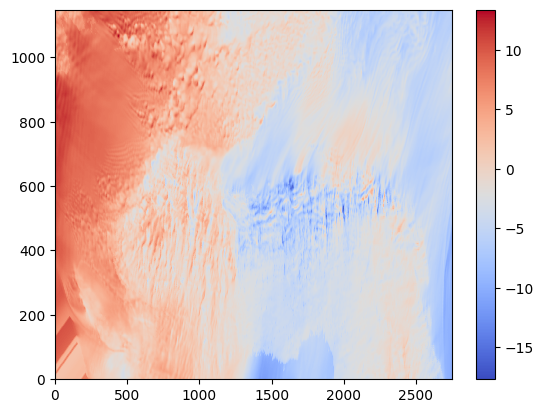

In [9]:
cmap = plt.cm.coolwarm
plt.pcolormesh(ds_interp_u['Uwind'][1,:,:], shading = "true", cmap=cmap)
plt.colorbar()
